In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
plt.style.use('seaborn')
sns.set(style="white")

from scipy import stats

from sklearn import metrics
from sklearn import linear_model

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import r2_score

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats import weightstats


# Viewing Data

In [353]:
housing_data = pd.read_csv("kc_house_data_train.csv")
del housing_data['Unnamed: 0']
housing_data

id             date      price  bedrooms  bathrooms  \
0      2591820310  20141006T000000   365000.0         4       2.25   
1      7974200820  20140821T000000   865000.0         5       3.00   
2      7701450110  20140815T000000  1038000.0         4       2.50   
3      9522300010  20150331T000000  1490000.0         3       3.50   
4      9510861140  20140714T000000   711000.0         3       2.50   
...           ...              ...        ...       ...        ...   
17285   627300195  20150303T000000   750000.0         5       2.50   
17286  8819900270  20140520T000000   440000.0         2       1.75   
17287  3816300095  20140514T000000   310000.0         3       1.00   
17288   122069107  20141204T000000   427500.0         3       1.50   
17289  6703100135  20150116T000000   348000.0         3       1.50   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             2070      8893     2.0           0     0  ...      8   
1             2900      6730     1.0           0     0  ...      8   
2             3770     10893     2.0           0     2  ...     11   
3             4560     14608     2.0           0     2  ...     12   
4             2550      5376     2.0           0     0  ...      9   
...            ...       ...     ...         ...   ...  ...    ...   
17285         3240      9960     1.0           0     1  ...      8   
17286         1300      4000     2.0           0     0  ...      7   
17287         1050      9876     1.0           0     0  ...      7   
17288         1900     43186     1.5           0     0  ...      7   
17289         1330      6768     1.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            2070              0      1986             0    98058  47.4388   
1            1830           1070      1977             0    98115  47.6784   
2            3770              0      1997             0    98006  47.5646   
3            4560              0      1990             0    98034  47.6995   
4            2550              0      2004             0    98052  47.6647   
...           ...            ...       ...           ...      ...      ...   
17285        2020           1220      1958             0    98008  47.5858   
17286        1300              0      1948             0    98105  47.6687   
17287        1050              0      1953             0    98028  47.7635   
17288        1300            600      1971             0    98038  47.4199   
17289        1330              0      1952             0    98155  47.7366   

          long  sqft_living15  sqft_lot15  
0     -122.162           2390        7700  
1     -122.285           2370        6283  
2     -122.129           3710        9685  
3     -122.228           4050       14226  
4     -122.083           2250        4050  
...        ...            ...         ...  
17285 -122.112           2730       10400  
17286 -122.288           1350        4013  
17287 -122.262           1760        9403  
17288 -121.990           2080      108028  
17289 -122.319           1320        6910  

[17290 rows x 21 columns]

In [354]:
housing_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [355]:
housing_data.describe

<bound method NDFrame.describe of                id             date      price  bedrooms  bathrooms  \
0      2591820310  20141006T000000   365000.0         4       2.25   
1      7974200820  20140821T000000   865000.0         5       3.00   
2      7701450110  20140815T000000  1038000.0         4       2.50   
3      9522300010  20150331T000000  1490000.0         3       3.50   
4      9510861140  20140714T000000   711000.0         3       2.50   
...           ...              ...        ...       ...        ...   
17285   627300195  20150303T000000   750000.0         5       2.50   
17286  8819900270  20140520T000000   440000.0         2       1.75   
17287  3816300095  20140514T000000   310000.0         3       1.00   
17288   122069107  20141204T000000   427500.0         3       1.50   
17289  6703100135  20150116T000000   348000.0         3       1.50   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             2070      8893     2.0           0     0 

In [356]:
housing_data.shape

(17290, 21)

In [357]:
housing_data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [358]:
housing_data.isna()

id   date  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      False  False  False     False      False        False     False   
1      False  False  False     False      False        False     False   
2      False  False  False     False      False        False     False   
3      False  False  False     False      False        False     False   
4      False  False  False     False      False        False     False   
...      ...    ...    ...       ...        ...          ...       ...   
17285  False  False  False     False      False        False     False   
17286  False  False  False     False      False        False     False   
17287  False  False  False     False      False        False     False   
17288  False  False  False     False      False        False     False   
17289  False  False  False     False      False        False     False   

       floors  waterfront   view  ...  grade  sqft_above  sqft_basement  \
0       False       False  False  ...  False       False          False   
1       False       False  False  ...  False       False          False   
2       False       False  False  ...  False       False          False   
3       False       False  False  ...  False       False          False   
4       False       False  False  ...  False       False          False   
...       ...         ...    ...  ...    ...         ...            ...   
17285   False       False  False  ...  False       False          False   
17286   False       False  False  ...  False       False          False   
17287   False       False  False  ...  False       False          False   
17288   False       False  False  ...  False       False          False   
17289   False       False  False  ...  False       False          False   

       yr_built  yr_renovated  zipcode    lat   long  sqft_living15  \
0         False         False    False  False  False          False   
1         False         False    False  False  False          False   
2         False         False    False  False  False          False   
3         False         False    False  False  False          False   
4         False         False    False  False  False          False   
...         ...           ...      ...    ...    ...            ...   
17285     False         False    False  False  False          False   
17286     False         False    False  False  False          False   
17287     False         False    False  False  False          False   
17288     False         False    False  False  False          False   
17289     False         False    False  False  False          False   

       sqft_lot15  
0           False  
1           False  
2           False  
3           False  
4           False  
...           ...  
17285       False  
17286       False  
17287       False  
17288       False  
17289       False  

[17290 rows x 21 columns]

# First MLR

In [359]:
mlr_model_1 = ols(formula='price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15', data=housing_data).fit()
mlr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     2350.
Date:                Mon, 15 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:57:52   Log-Likelihood:            -2.3601e+05
No. Observations:               17290   AIC:                         4.721e+05
Df Residuals:                   17272   BIC:                         4.722e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.567e+06   3.33e+06      1.372      0.170   -1.96e+06    1.11e+07
bedrooms      -3.627e+04   2116.413    -17.137      0.000   -4.04e+04   -3.21e+04
bathrooms      4.126e+04   3700.592     11.150      0.000     3.4e+04    4.85e+04
sqft_living     114.2296      2.574     44.384      0.000     109.185     119.274
sqft_lot          0.1044      0.052      1.998      0.046       0.002       0.207
floors         5600.2941   4094.525      1.368      0.171   -2425.390    1.36e+04
waterfront     5.947e+05   1.93e+04     30.803      0.000    5.57e+05    6.33e+05
view           5.252e+04   2416.118     21.739      0.000    4.78e+04    5.73e+04
condition      2.627e+04   2670.585      9.835      0.000     2.1e+04    3.15e+04
grade          9.527e+04   2458.796     38.745      0.000    9.04e+04       1e+05
sqft_above       73.1254      2.578     28.366      0.000      68.072      78.178
sqft_basement    41.1028      3.008     13.663      0.000      35.206      47.000
yr_built      -2653.6616     82.565    -32.140      0.000   -2815.498   -2491.825
yr_renovated     17.4437      4.175      4.178      0.000       9.260      25.627
zipcode        -567.4119     37.523    -15.122      0.000    -640.962    -493.862
lat            6.021e+05   1.22e+04     49.222      0.000    5.78e+05    6.26e+05
long          -2.208e+05   1.49e+04    -14.830      0.000    -2.5e+05   -1.92e+05
sqft_living15    22.0718      3.929      5.618      0.000      14.371      29.773
sqft_lot15       -0.3200      0.082     -3.907      0.000      -0.481      -0.159
==============================================================================
Omnibus:                    15315.583   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1731673.987
Skew:                           3.780   Prob(JB):                         0.00
Kurtosis:                      51.441   Cond. No.                     5.05e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.87e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [360]:
corr_1 = housing_data.corr()
corr_1

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.015644 -0.001529   0.003833    -0.014251 -0.129837   
price         -0.015644  1.000000  0.305106   0.524335     0.703540  0.086803   
bedrooms      -0.001529  0.305106  1.000000   0.507867     0.570428  0.029375   
bathrooms      0.003833  0.524335  0.507867   1.000000     0.755270  0.085470   
sqft_living   -0.014251  0.703540  0.570428   0.755270     1.000000  0.166810   
sqft_lot      -0.129837  0.086803  0.029375   0.085470     0.166810  1.000000   
floors         0.017126  0.256985  0.172975   0.497967     0.357169 -0.002205   
waterfront     0.000101  0.275779 -0.008581   0.065848     0.109738  0.015356   
view           0.012594  0.395485  0.079741   0.188817     0.283336  0.073058   
condition     -0.014272  0.036099  0.025266  -0.122976    -0.061530 -0.013715   
grade          0.003163  0.666215  0.354679   0.664191     0.762929  0.110320   
sqft_above    -0.013932  0.607760  0.472492   0.686853     0.876696  0.180755   
sqft_basement -0.003516  0.323312  0.300085   0.282700     0.435529  0.008065   
yr_built       0.013697  0.056450  0.153769   0.507761     0.319397  0.054228   
yr_renovated  -0.019560  0.117770  0.013679   0.048140     0.051448  0.004520   
zipcode       -0.008166 -0.048958 -0.147515  -0.201527    -0.195893 -0.126590   
lat           -0.001865  0.302394 -0.002170   0.023074     0.052646 -0.082029   
long           0.017388  0.019327  0.124279   0.221308     0.234453  0.226190   
sqft_living15 -0.007494  0.585567  0.387589   0.568080     0.755066  0.136959   
sqft_lot15    -0.139605  0.081423  0.026665   0.086499     0.179570  0.701875   

                 floors  waterfront      view  condition     grade  \
id             0.017126    0.000101  0.012594  -0.014272  0.003163   
price          0.256985    0.275779  0.395485   0.036099  0.666215   
bedrooms       0.172975   -0.008581  0.079741   0.025266  0.354679   
bathrooms      0.497967    0.065848  0.188817  -0.122976  0.664191   
sqft_living    0.357169    0.109738  0.283336  -0.061530  0.762929   
sqft_lot      -0.002205    0.015356  0.073058  -0.013715  0.110320   
floors         1.000000    0.025132  0.025883  -0.259230  0.458984   
waterfront     0.025132    1.000000  0.407565   0.009608  0.092234   
view           0.025883    0.407565  1.000000   0.045060  0.249554   
condition     -0.259230    0.009608  0.045060   1.000000 -0.142066   
grade          0.458984    0.092234  0.249554  -0.142066  1.000000   
sqft_above     0.528509    0.077162  0.164747  -0.157466  0.758247   
sqft_basement -0.247481    0.083433  0.279939   0.166923  0.165003   
yr_built       0.483657   -0.021981 -0.049593  -0.358921  0.448003   
yr_renovated   0.005985    0.094268  0.091291  -0.060969  0.007988   
zipcode       -0.060560    0.034282  0.089475   0.007068 -0.184946   
lat            0.048227   -0.013331  0.003820  -0.009927  0.116196   
long           0.128795   -0.042728 -0.077572  -0.109200  0.198369   
sqft_living15  0.283933    0.091090  0.279999  -0.094307  0.715745   
sqft_lot15    -0.008170    0.026895  0.073185  -0.007125  0.116062   

               sqft_above  sqft_basement  yr_built  yr_renovated   zipcode  \
id              -0.013932      -0.003516  0.013697     -0.019560 -0.008166   
price            0.607760       0.323312  0.056450      0.117770 -0.048958   
bedrooms         0.472492       0.300085  0.153769      0.013679 -0.147515   
bathrooms        0.686853       0.282700  0.507761      0.048140 -0.201527   
sqft_living      0.876696       0.435529  0.319397      0.051448 -0.195893   
sqft_lot         0.180755       0.008065  0.054228      0.004520 -0.126590   
floors           0.528509      -0.247481  0.483657      0.005985 -0.060560   
waterfront       0.077162       0.083433 -0.021981      0.094268  0.034282   
view             0.164747       0.279939 -0.049593      0.091291  0.089475   
condition       -0.157466       0.166923 -0.358921     -0.060969  0.

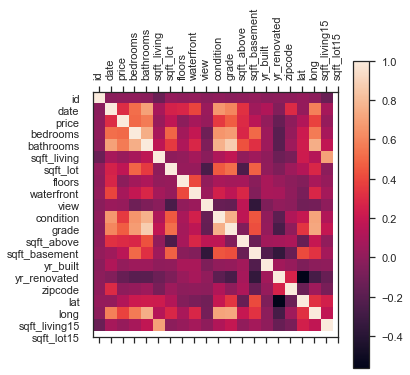

In [361]:
plt.matshow(housing_data.corr())
plt.xticks(range(len(housing_data.columns)), housing_data.columns, rotation='vertical')
plt.yticks(range(len(housing_data.columns)), housing_data.columns)
plt.colorbar()
plt.show()

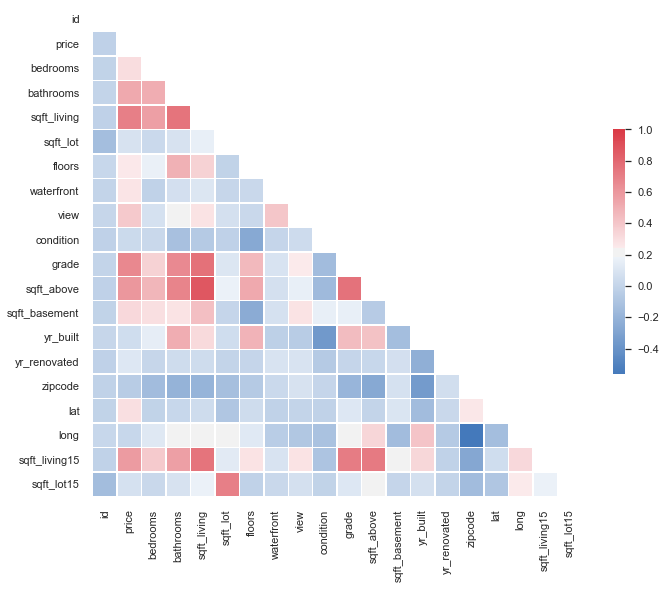

In [362]:
def CorrMtx(housing_data, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(housing_data, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(housing_data, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(housing_data, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(corr_1, dropDuplicates = True)

# Removing Outliers

Created a new variable to work with "housing_data_2". Now the data I will focuse on will only include houses with 'prices' <=$1,600,000, 'bedrooms' <=6, 'bathrooms' <=5, 'sqft_living' <=5000, 'sqft_lot' <=135,000, 'floors' <=3, 'sqft_above' <=5500, 'sqft_basement' <=1500, 'sqft_living15' <=4500, 'sqft_lot15' <=100,000

In [363]:
housing_data_2 = housing_data[(housing_data['price']<=1600000)&(housing_data['bedrooms']<=6)&(housing_data['bathrooms']<=5)&(housing_data['sqft_living']<=5000)&(housing_data['sqft_lot']<=135000)&(housing_data['floors']<=3)&(housing_data['sqft_above']<=5500)&(housing_data['sqft_basement']<=1500)&(housing_data['sqft_living15']<=4500)&(housing_data['sqft_lot15']<=100000)]

In [364]:
housing_data_2.shape

(16254, 21)

In [365]:
housing_data_2.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [366]:
housing_data_2.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [367]:
housing_data_2.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  1.625400e+04  1.625400e+04  16254.000000  16254.000000  16254.000000   
mean   4.636397e+09  4.952352e+05      3.326750      2.055586   1978.082011   
std    2.875027e+09  2.462154e+05      0.865168      0.712801    764.014583   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.172001e+09  3.150000e+05      3.000000      1.500000   1400.000000   
50%    4.004500e+09  4.400000e+05      3.000000      2.000000   1870.000000   
75%    7.370350e+09  6.150000e+05      4.000000      2.500000   2440.000000   
max    9.900000e+09  1.600000e+06      6.000000      5.000000   5000.000000   

            sqft_lot        floors    waterfront          view     condition  \
count   16254.000000  16254.000000  16254.000000  16254.000000  16254.000000   
mean    10177.956934      1.482004      0.004553      0.188569      3.407407   
std     11854.983188      0.537265      0.067322      0.676901      0.649681   
min       572.000000      1.000000      0.000000      0.000000      1.000000   
25%      5000.000000      1.000000      0.000000      0.000000      3.000000   
50%      7467.000000      1.000000      0.000000      0.000000      3.000000   
75%     10080.000000      2.000000      0.000000      0.000000      4.000000   
max    134489.000000      3.000000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  16254.000000  16254.000000   16254.000000  16254.000000  16254.000000   
mean       7.558632   1716.524240     261.557770   1970.334687     79.924695   
std        1.067743    731.707222     389.276889     29.417143    391.311583   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1180.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1520.000000       0.000000   1973.000000      0.000000   
75%        8.000000   2120.000000     520.000000   1996.000000      0.000000   
max       12.000000   5000.000000    1500.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15    sqft_lot15  
count  16254.000000  16254.000000  16254.000000   16254.000000  16254.000000  
mean   98079.559493     47.560468   -122.218514    1930.851975   9425.354928  
std       53.696345      0.138776      0.138490     622.321529   9689.168462  
min    98001.000000     47.155900   -122.512000     460.000000    659.000000  
25%    98033.000000     47.471400   -122.332000    1470.000000   5040.000000  
50%    98072.000000     47.571000   -122.239000    1800.000000   7500.000000  
75%    98118.000000     47.679900   -122.132000    2290.000000   9719.750000  
max    98199.000000     47.777600   -121.315000    4495.000000  99316.000000

# Second MLR

In [368]:
mlr_model_2 = ols(formula='price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+zipcode+sqft_living15+sqft_lot15', data=housing_data_2).fit()
mlr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     1743.
Date:                Mon, 15 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:57:53   Log-Likelihood:            -2.1704e+05
No. Observations:               16254   AIC:                         4.341e+05
Df Residuals:                   16238   BIC:                         4.342e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.291e+06   2.54e+06     -2.084      0.037   -1.03e+07   -3.15e+05
bedrooms      -1.851e+04   1805.561    -10.249      0.000    -2.2e+04    -1.5e+04
bathrooms      2.975e+04   2955.139     10.068      0.000     2.4e+04    3.55e+04
sqft_living      61.9666      2.300     26.942      0.000      57.458      66.475
sqft_lot         -0.0803      0.182     -0.441      0.659      -0.437       0.276
floors         4.568e+04   3230.113     14.142      0.000    3.93e+04     5.2e+04
waterfront      1.87e+05   1.91e+04      9.767      0.000    1.49e+05    2.25e+05
view           3.035e+04   2011.757     15.089      0.000    2.64e+04    3.43e+04
condition      2.259e+04   2048.766     11.027      0.000    1.86e+04    2.66e+04
grade          1.059e+05   1888.072     56.084      0.000    1.02e+05     1.1e+05
sqft_above       15.2470      2.138      7.132      0.000      11.056      19.438
sqft_basement    46.7186      2.543     18.375      0.000      41.735      51.702
yr_built      -2869.6782     61.389    -46.745      0.000   -2990.008   -2749.348
yr_renovated     10.2765      3.268      3.144      0.002       3.870      16.683
zipcode         104.2144     25.491      4.088      0.000      54.249     154.179
sqft_living15    61.5946      3.266     18.859      0.000      55.193      67.996
sqft_lot15       -1.2311      0.224     -5.501      0.000      -1.670      -0.792
==============================================================================
Omnibus:                     2412.728   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6767.906
Skew:                           0.803   Prob(JB):                         0.00
Kurtosis:                       5.723   Cond. No.                     5.17e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.97e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [369]:
corr_2 = housing_data_2.corr()
corr.style.background_gradient(cmap="coolwarm").set_precision(2)

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


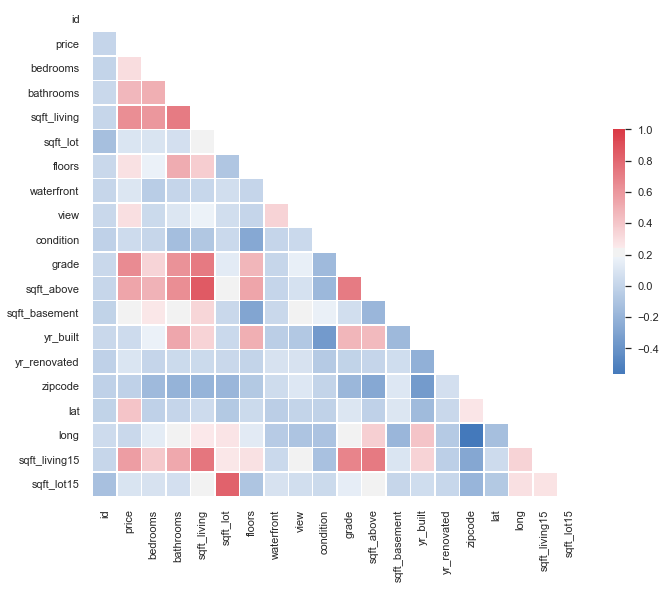

In [370]:
def CorrMtx(housing_data_2, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(housing_data_2, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(housing_data_2, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(housing_data_2, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(corr_2, dropDuplicates = True)

In [371]:
housing_data_2['waterfront'].value_counts()

0    16180
1       74
Name: waterfront, dtype: int64

# Dummy variable

In [372]:
pd.get_dummies(housing_data_2['waterfront'])

0  1
0      1  0
1      1  0
2      1  0
3      1  0
4      1  0
...   .. ..
17284  1  0
17285  1  0
17286  1  0
17287  1  0
17289  1  0

[16254 rows x 2 columns]

In [373]:
pd.get_dummies(housing_data_2, columns=['waterfront'])

id             date      price  bedrooms  bathrooms  \
0      2591820310  20141006T000000   365000.0         4       2.25   
1      7974200820  20140821T000000   865000.0         5       3.00   
2      7701450110  20140815T000000  1038000.0         4       2.50   
3      9522300010  20150331T000000  1490000.0         3       3.50   
4      9510861140  20140714T000000   711000.0         3       2.50   
...           ...              ...        ...       ...        ...   
17284  2078500350  20140604T000000   560000.0         3       2.50   
17285   627300195  20150303T000000   750000.0         5       2.50   
17286  8819900270  20140520T000000   440000.0         2       1.75   
17287  3816300095  20140514T000000   310000.0         3       1.00   
17289  6703100135  20150116T000000   348000.0         3       1.50   

       sqft_living  sqft_lot  floors  view  condition  ...  sqft_basement  \
0             2070      8893     2.0     0          4  ...              0   
1             2900      6730     1.0     0          5  ...           1070   
2             3770     10893     2.0     2          3  ...              0   
3             4560     14608     2.0     2          3  ...              0   
4             2550      5376     2.0     0          3  ...              0   
...            ...       ...     ...   ...        ...  ...            ...   
17284         2070     12708     2.0     0          3  ...              0   
17285         3240      9960     1.0     1          3  ...           1220   
17286         1300      4000     2.0     0          3  ...              0   
17287         1050      9876     1.0     0          3  ...              0   
17289         1330      6768     1.0     0          4  ...              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1986             0    98058  47.4388 -122.162           2390   
1          1977             0    98115  47.6784 -122.285           2370   
2          1997             0    98006  47.5646 -122.129           3710   
3          1990             0    98034  47.6995 -122.228           4050   
4          2004             0    98052  47.6647 -122.083           2250   
...         ...           ...      ...      ...      ...            ...   
17284      1996             0    98056  47.5295 -122.180           2620   
17285      1958             0    98008  47.5858 -122.112           2730   
17286      1948             0    98105  47.6687 -122.288           1350   
17287      1953             0    98028  47.7635 -122.262           1760   
17289      1952             0    98155  47.7366 -122.319           1320   

       sqft_lot15  waterfront_0  waterfront_1  
0            7700             1             0  
1            6283             1             0  
2            9685             1             0  
3           14226             1             0  
4            4050             1             0  
...           ...           ...           ...  
17284        9617             1             0  
17285       10400             1             0  
17286        4013             1             0  
17287        9403             1             0  
17289        6910             1             0  

[16254 rows x 22 columns]

In [374]:
dummy_df = pd.get_dummies(housing_data_2, columns=['waterfront'])

In [375]:
dummy_model = ols(formula='price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+zipcode+sqft_living15+sqft_lot15+waterfront_0+waterfront_1', data=dummy_df).fit()
dummy_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     1743.
Date:                Mon, 15 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:58:01   Log-Likelihood:            -2.1704e+05
No. Observations:               16254   AIC:                         4.341e+05
Df Residuals:                   16238   BIC:                         4.342e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.465e+06   1.69e+06     -2.047      0.041   -6.78e+06   -1.48e+05
bedrooms      -1.851e+04   1805.561    -10.249      0.000    -2.2e+04    -1.5e+04
bathrooms      2.975e+04   2955.139     10.068      0.000     2.4e+04    3.55e+04
sqft_living      61.9663      2.300     26.942      0.000      57.458      66.475
sqft_lot         -0.0803      0.182     -0.441      0.659      -0.437       0.276
floors         4.568e+04   3230.113     14.142      0.000    3.93e+04     5.2e+04
view           3.035e+04   2011.757     15.089      0.000    2.64e+04    3.43e+04
condition      2.259e+04   2048.766     11.027      0.000    1.86e+04    2.66e+04
grade          1.059e+05   1888.072     56.084      0.000    1.02e+05     1.1e+05
sqft_above       15.2473      2.138      7.132      0.000      11.057      19.438
sqft_basement    46.7189      2.543     18.375      0.000      41.735      51.702
yr_built      -2869.6782     61.389    -46.745      0.000   -2990.008   -2749.348
yr_renovated     10.2765      3.268      3.144      0.002       3.870      16.683
zipcode         104.2144     25.491      4.088      0.000      54.249     154.179
sqft_living15    61.5946      3.266     18.859      0.000      55.193      67.996
sqft_lot15       -1.2311      0.224     -5.501      0.000      -1.670      -0.792
waterfront_0  -1.826e+06   8.46e+05     -2.158      0.031   -3.48e+06   -1.67e+05
waterfront_1  -1.639e+06   8.46e+05     -1.936      0.053    -3.3e+06       2e+04
==============================================================================
Omnibus:                     2412.728   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6767.906
Skew:                           0.803   Prob(JB):                         0.00
Kurtosis:                       5.723   Cond. No.                     3.19e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.57e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [376]:
dummy_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'waterfront_0', 'waterfront_1'],
      dtype='object')

In [377]:
dummy_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
waterfront_0       uint8
waterfront_1       uint8
dtype: object

# Train Test Split

In [378]:
features=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
          'floors', 'view', 'condition', 'grade', 'sqft_above', 
          'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 
          'sqft_living15', 'sqft_lot15', 'waterfront_0', 'waterfront_1'
         ]

df_features = dummy_df[features]

target = dummy_df['price']

In [379]:
df_features.isnull().mean()

bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
sqft_living15    0.0
sqft_lot15       0.0
waterfront_0     0.0
waterfront_1     0.0
dtype: float64

In [380]:
x_train, x_test, y_train, y_test = train_test_split(df_features, target, random_state=24,test_size=0.2)

In [381]:
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(x_train)

#transform the training data
x_train = pd.DataFrame(data=scaler.transform(x_train), columns=df_features.columns)

#transform the testing dat
x_test = pd.DataFrame(data=scaler.transform(x_test), columns=df_features.columns)

In [382]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(x_train, y_train)

y_train_pred = lm.predict(x_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 152581.30656961128


In [383]:
#use fitted model to predict on the test examples
y_pred = lm.predict(x_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 151766.58340384995
Training:  152581 vs. Testing:  151766


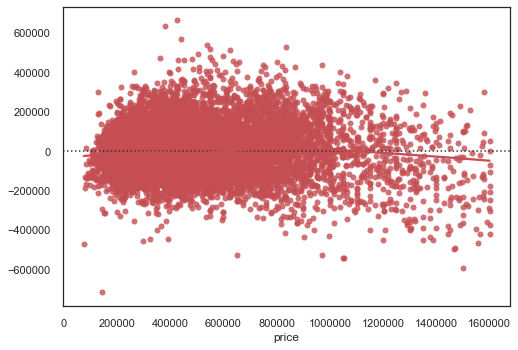

In [384]:
sns.residplot( y_train, y_train_pred,lowess=True, color="r")

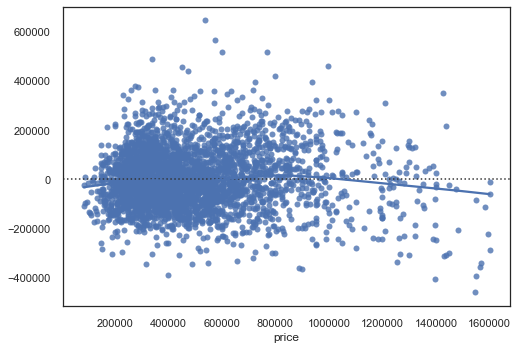

In [385]:
sns.residplot( y_test, y_pred, lowess=True, color="b")

In [386]:
y_log = np.sqrt(y_train)

In [387]:
#instantiate a linear regression object
lm_log = LinearRegression()

#fit the linear regression to the data
lm_log = lm_log.fit(x_train, y_log)

y_train_pred = lm_log.predict(x_train)

#exponentiate the predictions to get them on the same original scale 
y_train_pred = np.square(y_train_pred)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 151548.07631519836


In [388]:
y_test_pred = lm_log.predict(x_test)


#our model predcicte the log of gross, so now we must exponentiate to get the value in $
y_test_pred = np.square(y_test_pred)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 150341.3974793532
Training:  151548 vs. Testing:  150341


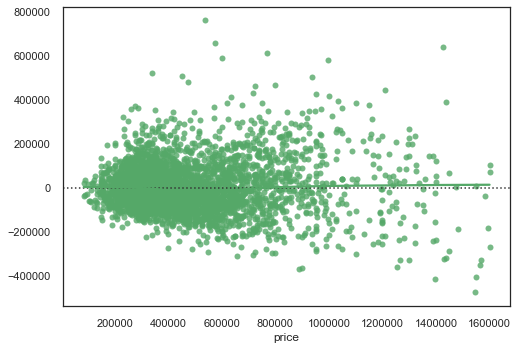

In [389]:
sns.residplot( y_test, y_test_pred, lowess=True, color="g")

# Polynomial

In [390]:
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(df_features)
poly2_columns = poly_2.get_feature_names(df_features.columns)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
df_poly2.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  view  condition  grade  \
0       4.0       2.25       2070.0    8893.0     2.0   0.0        4.0    8.0   
1       5.0       3.00       2900.0    6730.0     1.0   0.0        5.0    8.0   
2       4.0       2.50       3770.0   10893.0     2.0   2.0        3.0   11.0   
3       3.0       3.50       4560.0   14608.0     2.0   2.0        3.0   12.0   
4       3.0       2.50       2550.0    5376.0     2.0   0.0        3.0    9.0   

   sqft_above  sqft_basement  ...  sqft_living15^2  sqft_living15 sqft_lot15  \
0      2070.0            0.0  ...        5712100.0                18403000.0   
1      1830.0         1070.0  ...        5616900.0                14890710.0   
2      3770.0            0.0  ...       13764100.0                35931350.0   
3      4560.0            0.0  ...       16402500.0                57615300.0   
4      2550.0            0.0  ...        5062500.0                 9112500.0   

   sqft_living15 waterfront_0  sqft_living15 waterfront_1  sqft_lot15^2  \
0                      2390.0                         0.0    59290000.0   
1                      2370.0                         0.0    39476089.0   
2                      3710.0                         0.0    93799225.0   
3                      4050.0                         0.0   202379076.0   
4                      2250.0                         0.0    16402500.0   

   sqft_lot15 waterfront_0  sqft_lot15 waterfront_1  waterfront_0^2  \
0                   7700.0                      0.0             1.0   
1                   6283.0                      0.0             1.0   
2                   9685.0                      0.0             1.0   
3                  14226.0                      0.0             1.0   
4                   4050.0                      0.0             1.0   

   waterfront_0 waterfront_1  waterfront_1^2  
0                        0.0             0.0  
1                        0.0             0.0  
2                        0.0             0.0  
3                        0.0             0.0  
4                        0.0             0.0  

[5 rows x 170 columns]

In [391]:
x_train, x_test, y_train, y_test = train_test_split(df_poly2, target, random_state=24,test_size=0.2)

In [392]:
scaler2 = StandardScaler()
# fit the scaler to the training data
scaler2.fit(x_train)

#transform the training data
x_train = pd.DataFrame(data=scaler2.transform(x_train), columns=df_poly2.columns)

#transform the testing dat
x_test = pd.DataFrame(data=scaler2.transform(x_test), columns=df_poly2.columns)

In [393]:
x_test.head()

bedrooms  bathrooms  sqft_living  sqft_lot    floors      view  condition  \
0  0.771494  -0.083607    -0.619182 -0.502250 -0.903352 -0.280055  -0.621546   
1 -0.383571  -0.083607    -0.187006 -0.353445 -0.903352 -0.280055   0.921697   
2 -0.383571   0.617095     1.240486  0.818441  0.024841 -0.280055  -0.621546   
3 -0.383571   1.317796    -0.946589 -0.753826  0.953035 -0.280055  -0.621546   
4 -1.538636  -1.485010    -1.627594 -0.211807 -0.903352 -0.280055   0.921697   

      grade  sqft_above  sqft_basement  ...  sqft_living15^2  \
0 -0.534769   -0.291802      -0.667332  ...        -0.660951   
1 -1.473812    0.159376      -0.667332  ...        -0.032960   
2  1.343315    1.649629      -0.667332  ...         2.088472   
3 -0.534769   -0.934388      -0.101282  ...        -0.343994   
4 -1.473812   -1.344549      -0.667332  ...        -1.058334   

   sqft_living15 sqft_lot15  sqft_living15 waterfront_0  \
0                 -0.524476                   -0.655803   
1                 -0.305675                    0.133390   
2                  1.747579                    1.948533   
3                 -0.240498                   -0.229639   
4                 -0.452401                   -1.334509   

   sqft_living15 waterfront_1  sqft_lot15^2  sqft_lot15 waterfront_0  \
0                   -0.064397     -0.260916                -0.530889   
1                   -0.064397     -0.232259                -0.348599   
2                   -0.064397      0.386393                 1.176656   
3                   -0.064397     -0.194357                -0.168099   
4                   -0.064397     -0.195225                -0.171782   

   sqft_lot15 waterfront_1  waterfront_0^2  waterfront_0 waterfront_1  \
0                -0.052991        0.066936                        0.0   
1                -0.052991        0.066936                        0.0   
2                -0.052991        0.066936                        0.0   
3                -0.052991        0.066936                        0.0   
4                -0.052991        0.066936                        0.0   

   waterfront_1^2  
0       -0.066936  
1       -0.066936  
2       -0.066936  
3       -0.066936  
4       -0.066936  

[5 rows x 170 columns]

In [394]:
# instantiate a linear regression object
lm_2 = LinearRegression()

#fit the linear regression to the data
lm_2 = lm_2.fit(x_train, y_train)

y_train_pred = lm_2.predict(x_train)

train2_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train2_rmse)

Training Root Mean Squared Error: 140107.07341780653


In [395]:
# use fitted model to predict on test data
y_pred = lm_2.predict(x_test)

test2_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test2_rmse)


print('Training: ', int(train2_rmse), "vs. Testing: ", int(test2_rmse))

Testing Root Mean Squared Error: 144162.17827193093
Training:  140107 vs. Testing:  144162


In [396]:
# Create correlation matrix
corr_matrix = x_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

bedrooms  bathrooms  sqft_living  sqft_lot  \
bedrooms                        NaN   0.504068     0.609284  0.099734   
bathrooms                       NaN        NaN     0.723350  0.070294   
sqft_living                     NaN        NaN          NaN  0.233014   
sqft_lot                        NaN        NaN          NaN       NaN   
floors                          NaN        NaN          NaN       NaN   
...                             ...        ...          ...       ...   
sqft_lot15 waterfront_0         NaN        NaN          NaN       NaN   
sqft_lot15 waterfront_1         NaN        NaN          NaN       NaN   
waterfront_0^2                  NaN        NaN          NaN       NaN   
waterfront_0 waterfront_1       NaN        NaN          NaN       NaN   
waterfront_1^2                  NaN        NaN          NaN       NaN   

                             floors      view  condition     grade  \
bedrooms                   0.177896  0.039782   0.014519  0.347841   
bathrooms                  0.516439  0.108398   0.137705  0.618237   
sqft_living                0.374414  0.182357   0.074493  0.722772   
sqft_lot                   0.086293  0.068130   0.025498  0.141795   
floors                          NaN  0.007166   0.268115  0.470910   
...                             ...       ...        ...       ...   
sqft_lot15 waterfront_0         NaN       NaN        NaN       NaN   
sqft_lot15 waterfront_1         NaN       NaN        NaN       NaN   
waterfront_0^2                  NaN       NaN        NaN       NaN   
waterfront_0 waterfront_1       NaN       NaN        NaN       NaN   
waterfront_1^2                  NaN       NaN        NaN       NaN   

                           sqft_above  sqft_basement  ...  sqft_living15^2  \
bedrooms                     0.498247       0.259373  ...         0.368398   
bathrooms                    0.645592       0.206184  ...         0.505655   
sqft_living                  0.865692       0.335497  ...         0.733220   
sqft_lot                     0.228213       0.028316  ...         0.255970   
floors                       0.543164       0.286593  ...         0.281599   
...                               ...            ...  ...              ...   
sqft_lot15 waterfront_0           NaN            NaN  ...              NaN   
sqft_lot15 waterfront_1           NaN            NaN  ...              NaN   
waterfront_0^2                    NaN            NaN  ...              NaN   
waterfront_0 waterfront_1         NaN            NaN  ...              NaN   
waterfront_1^2                    NaN            NaN  ...              NaN   

                           sqft_living15 sqft_lot15  \
bedrooms                                   0.165431   
bathrooms                                  0.198525   
sqft_living                                0.382621   
sqft_lot                                   0.791884   
floors                                     0.024090   
...                                             ...   
sqft_lot15 waterfront_0                         NaN   
sqft_lot15 waterfront_1                         NaN   
waterfront_0^2                                  NaN   
waterfront_0 waterfront_1                       NaN   
waterfront_1^2                                  NaN   

                           sqft_living15 waterfront_0  \
bedrooms                                     0.396980   
bathrooms                                    0.517556   
sqft_living                                  0.725615   
sqft_lot                                     0.243508   
floors                                       0.277302   
...                                               ...   
sqft_lot15 waterfront_0                           NaN   
sqft_lot15 waterfront_1                           NaN   
waterfront_0^2                                    NaN   
waterfront_0 waterfront_1                         NaN   
waterfront_1^2                                    NaN   

                          

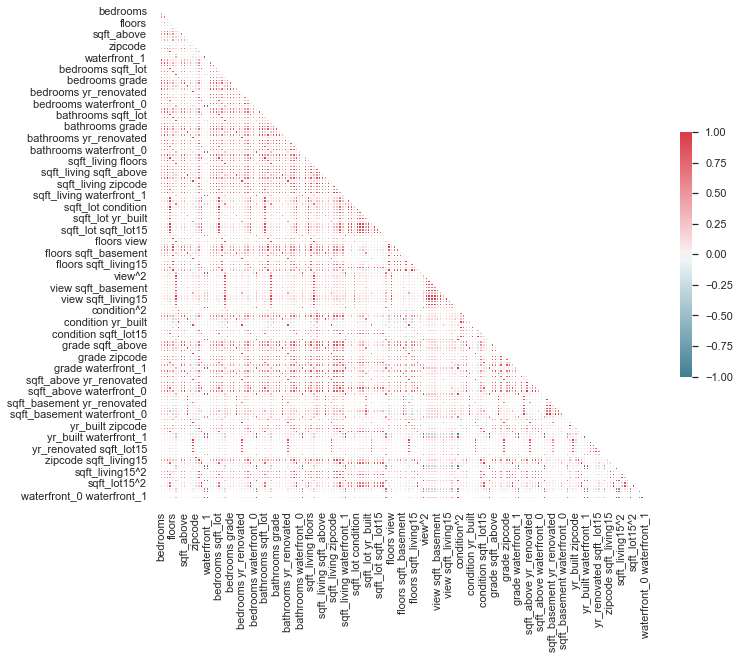

In [397]:
sns.set(style="white")


# Compute the correlation matrix
corr = x_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [398]:
len(x_train.columns)

170

In [399]:
# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

#if you change inplace to True it will go through and drop all of those columns from the dataset
x_train.drop(columns=to_drop, inplace=False)
x_test.drop(columns=to_drop, inplace=False)

bedrooms  bathrooms  sqft_living  sqft_lot    floors      view  \
0     0.771494  -0.083607    -0.619182 -0.502250 -0.903352 -0.280055   
1    -0.383571  -0.083607    -0.187006 -0.353445 -0.903352 -0.280055   
2    -0.383571   0.617095     1.240486  0.818441  0.024841 -0.280055   
3    -0.383571   1.317796    -0.946589 -0.753826  0.953035 -0.280055   
4    -1.538636  -1.485010    -1.627594 -0.211807 -0.903352 -0.280055   
...        ...        ...          ...       ...       ...       ...   
3246 -0.383571  -0.433957    -1.273995 -0.135930 -0.903352 -0.280055   
3247 -0.383571  -1.485010    -1.378765 -0.424264  0.024841 -0.280055   
3248  1.926560   1.317796     0.729732  0.103674 -0.903352 -0.280055   
3249 -1.538636  -1.485010    -1.064455 -0.425108 -0.903352 -0.280055   
3250 -1.538636  -1.485010    -1.601401 -0.350495 -0.903352 -0.280055   

      condition     grade  sqft_above  sqft_basement  ...  view sqft_lot15  \
0     -0.621546 -0.534769   -0.291802      -0.667332  ...        -0.191383   
1      0.921697 -1.473812    0.159376      -0.667332  ...        -0.191383   
2     -0.621546  1.343315    1.649629      -0.667332  ...        -0.191383   
3     -0.621546 -0.534769   -0.934388      -0.101282  ...        -0.191383   
4      0.921697 -1.473812   -1.344549      -0.667332  ...        -0.191383   
...         ...       ...         ...            ...  ...              ...   
3246  -0.621546 -0.534769   -0.975404      -0.667332  ...        -0.191383   
3247   2.464939 -1.473812   -1.084780      -0.667332  ...        -0.191383   
3248  -0.621546  0.404273   -0.619931       2.600322  ...        -0.191383   
3249  -0.621546 -1.473812   -1.016420      -0.178471  ...        -0.191383   
3250  -0.621546 -1.473812   -1.317205      -0.667332  ...        -0.191383   

      condition grade  condition sqft_living15  grade waterfront_0  \
0           -0.852102                -0.881319           -0.454722   
1           -0.302032                 0.657318           -1.305478   
2            0.248039                 1.288553            1.246789   
3           -0.852102                -0.526249           -0.454722   
4           -0.302032                -0.973374           -1.305478   
...               ...                      ...                 ...   
3246        -0.852102                -0.894469           -0.454722   
3247         0.798109                -0.543783           -1.305478   
3248        -0.302032                -0.118576            0.396033   
3249        -1.402173                -0.684057           -1.305478   
3250        -1.402173                -0.092274           -1.305478   

      sqft_basement yr_renovated  sqft_basement waterfront_1  \
0                      -0.130055                   -0.042854   
1                      -0.130055                   -0.042854   
2                      -0.130055                   -0.042854   
3                      -0.130055                   -0.042854   
4                      -0.130055                   -0.042854   
...                          ...                         ...   
3246                   -0.130055                   -0.042854   
3247                   -0.130055                   -0.042854   
3248                   10.955110                   -0.042854   
3249                   -0.130055                   -0.042854   
3250                   -0.130055                   -0.042854   

      yr_renovated sqft_lot15  yr_renovated waterfront_1  \
0                   -0.135442                  -0.037231   
1                    1.775652                  -0.037231   
2                   -0.135442                  -0.037231   
3                   -0.135442                  -0.037231   
4                   -0.135442                  -0.037231   
...                       ...                        ...   
3246                -0.135442                  -0.037231   
3247                -0.135442                  -0.037231   
3248                 3.408925                  -0.0372

In [400]:
to_drop

['waterfront_1',
 'bedrooms^2',
 'bedrooms sqft_living',
 'bedrooms sqft_lot',
 'bedrooms view',
 'bedrooms grade',
 'bedrooms sqft_above',
 'bedrooms sqft_basement',
 'bedrooms yr_built',
 'bedrooms yr_renovated',
 'bedrooms zipcode',
 'bedrooms sqft_lot15',
 'bedrooms waterfront_0',
 'bedrooms waterfront_1',
 'bathrooms^2',
 'bathrooms sqft_living',
 'bathrooms sqft_lot',
 'bathrooms view',
 'bathrooms grade',
 'bathrooms sqft_above',
 'bathrooms sqft_basement',
 'bathrooms yr_built',
 'bathrooms yr_renovated',
 'bathrooms zipcode',
 'bathrooms sqft_living15',
 'bathrooms sqft_lot15',
 'bathrooms waterfront_0',
 'bathrooms waterfront_1',
 'sqft_living^2',
 'sqft_living sqft_lot',
 'sqft_living view',
 'sqft_living grade',
 'sqft_living sqft_above',
 'sqft_living sqft_basement',
 'sqft_living yr_built',
 'sqft_living yr_renovated',
 'sqft_living zipcode',
 'sqft_living sqft_living15',
 'sqft_living sqft_lot15',
 'sqft_living waterfront_0',
 'sqft_living waterfront_1',
 'sqft_lot^2',
 

# Variance Inflation Factor (VIF)

In [401]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [402]:
[variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


[inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 76.88595263943174,
 158.7756756978369,
 inf,
 108.60614283002278,
 108.72518370402761,
 31.145213090767562,
 85.65988369171066,
 375.11515040022823,
 inf,
 inf,
 15672.334441809871,
 29.33464305657238,
 7464557.121981546,
 168.7749897016788,
 110.93573798379498,
 inf,
 inf,
 127.9319368648462,
 inf,
 110.76468697793581,
 162.9268927084083,
 36.70747013363334,
 115.17671168617699,
 754.6024229637667,
 inf,
 inf,
 29925.253327970946,
 29.32482862905918,
 14364923.042398376,
 259.25741446963474,
 105.3803296521971,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 23.41961388035083,
 86.76179583295658,
 9.177269971552295,
 108.7599292541681,
 464.15997588162503,
 inf,
 inf,
 53259.08651046005,
 6.141365500464783,
 23964407.51673373,
 88.67665804356105,
 36.06736888981497,
 inf,
 inf,
 92.66420943725937,
 23.546185032273463,
 103.685191

In [403]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_features.values, i) for i in range(df_features.shape[1])]
vif["features"] = df_features.columns
vif.round(1)

VIF Factor       features
0          1.7       bedrooms
1          3.1      bathrooms
2          inf    sqft_living
3          3.3       sqft_lot
4          2.1         floors
5          1.3           view
6          1.2      condition
7          2.8          grade
8          inf     sqft_above
9          inf  sqft_basement
10         2.3       yr_built
11         1.1   yr_renovated
12         1.3        zipcode
13         2.9  sqft_living15
14         3.3     sqft_lot15
15   4485986.6   waterfront_0
16     20519.6   waterfront_1

In [404]:
df_features.corrwith(target).abs()

bedrooms         0.306475
bathrooms        0.467382
sqft_living      0.641794
sqft_lot         0.104919
floors           0.286251
view             0.299132
condition        0.042688
grade            0.652258
sqft_above       0.545425
sqft_basement    0.234407
yr_built         0.046614
yr_renovated     0.107322
zipcode          0.014740
sqft_living15    0.574547
sqft_lot15       0.097429
waterfront_0     0.112843
waterfront_1     0.112843
dtype: float64

# F Test

In [405]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=15)

selector.fit(x_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


SelectKBest(k=15, score_func=<function f_regression at 0x7fd31597c5f0>)

In [406]:
selected_columns = x_train.columns[selector.get_support()]
removed_columns = x_train.columns[~selector.get_support()]

In [407]:
list(removed_columns)

['bedrooms',
 'bathrooms',
 'sqft_lot',
 'floors',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'sqft_living15',
 'sqft_lot15',
 'waterfront_0',
 'waterfront_1',
 'bedrooms^2',
 'bedrooms bathrooms',
 'bedrooms sqft_living',
 'bedrooms sqft_lot',
 'bedrooms floors',
 'bedrooms view',
 'bedrooms condition',
 'bedrooms grade',
 'bedrooms sqft_above',
 'bedrooms sqft_basement',
 'bedrooms yr_built',
 'bedrooms yr_renovated',
 'bedrooms zipcode',
 'bedrooms sqft_living15',
 'bedrooms sqft_lot15',
 'bedrooms waterfront_0',
 'bedrooms waterfront_1',
 'bathrooms^2',
 'bathrooms sqft_lot',
 'bathrooms floors',
 'bathrooms view',
 'bathrooms condition',
 'bathrooms grade',
 'bathrooms sqft_above',
 'bathrooms sqft_basement',
 'bathrooms yr_built',
 'bathrooms yr_renovated',
 'bathrooms zipcode',
 'bathrooms sqft_living15',
 'bathrooms sqft_lot15',
 'bathrooms waterfront_0',
 'bathrooms waterfront_1',
 'sqft_living sqft_lot',
 'sqft_living fl

In [408]:
list(selected_columns)

['sqft_living',
 'grade',
 'bathrooms sqft_living',
 'sqft_living^2',
 'sqft_living condition',
 'sqft_living grade',
 'sqft_living yr_built',
 'sqft_living zipcode',
 'sqft_living sqft_living15',
 'sqft_living waterfront_0',
 'grade^2',
 'grade sqft_above',
 'grade yr_built',
 'grade zipcode',
 'grade sqft_living15']

In [409]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(x_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(x_train[selected_columns])


train3_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , train3_rmse)

y_kbest = lm_kbest.predict(x_test[selected_columns])

test3_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , test3_rmse)


print('Original: ', test_rmse, "vs. KBest: ", test3_rmse)

Training Root Mean Squared Error: 154359.36836459502
Testing Root Mean Squared Error: 154072.23335387523
Original:  150341.3974793532 vs. KBest:  154072.23335387523


# Wrapper Methods
## Recursive & Polynomial

In [410]:
x_train4, x_test4, y_train, y_test = train_test_split(df_poly2, target, random_state=24,test_size=0.2)

In [411]:
from sklearn.feature_selection import RFECV
ols = linear_model.LinearRegression()

In [412]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=10, scoring='neg_mean_squared_error')

# Fit recursive feature eliminator 
selector.fit(x_train4, y_train)

RFECV(cv=10,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [413]:
selected_rfe = x_train4.columns[selector.support_]
removed_rfe = x_train4.columns[~selector.support_]

In [414]:
list(removed_rfe)

['waterfront_0 waterfront_1']

In [415]:
len(list(selected_rfe))

169

In [416]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(x_train4[selected_rfe], y_train)

y_rfe = lm_rfe.predict(x_train4[selected_rfe])


train4_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , train4_rmse)

y_pred_rfe = lm_rfe.predict(x_test4[selected_rfe])

test4_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , test4_rmse)


print('Original: ', test_rmse, "vs. KBest: ", test3_rmse, "vs. RFE: ", test4_rmse)

Training Root Mean Squared Error: 140105.65177239783
Testing Root Mean Squared Error: 144153.28084093382
Original:  150341.3974793532 vs. KBest:  154072.23335387523 vs. RFE:  144153.28084093382


## Lasso

In [417]:
x_train.head()

bedrooms  bathrooms  sqft_living  sqft_lot    floors      view  condition  \
0  0.771494   0.617095     1.161908  2.155318  0.953035 -0.280055   0.921697   
1  0.771494   0.967446     2.340571  1.239730  0.953035  2.655504   0.921697   
2 -0.383571   0.617095     0.572577  0.045586  0.953035 -0.280055  -0.621546   
3 -0.383571   0.617095    -0.383450 -0.446353  0.953035 -0.280055  -0.621546   
4 -0.383571  -0.083607    -0.841819 -0.629977  0.024841 -0.280055  -0.621546   

      grade  sqft_above  sqft_basement  ...  sqft_living15^2  \
0  1.343315    1.567597      -0.667332  ...         1.126647   
1  0.404273    1.130091       2.471674  ...         1.012324   
2  0.404273    0.952355      -0.667332  ...        -0.117739   
3 -0.534769   -0.045705      -0.667332  ...         0.283997   
4 -0.534769   -0.524227      -0.667332  ...        -0.004130   

   sqft_living15 sqft_lot15  sqft_living15 waterfront_0  \
0                  3.561090                    1.222476   
1                  0.407592                    1.127773   
2                 -0.127164                    0.038686   
3                 -0.348877                    0.464851   
4                 -0.412528                    0.164957   

   sqft_living15 waterfront_1  sqft_lot15^2  sqft_lot15 waterfront_0  \
0                   -0.064397      2.447774                 3.358342   
1                   -0.064397     -0.077087                 0.230476   
2                   -0.064397     -0.172912                -0.081901   
3                   -0.064397     -0.251056                -0.460899   
4                   -0.064397     -0.256320                -0.496999   

   sqft_lot15 waterfront_1  waterfront_0^2  waterfront_0 waterfront_1  \
0                -0.052991        0.066936                        0.0   
1                -0.052991        0.066936                        0.0   
2                -0.052991        0.066936                        0.0   
3                -0.052991        0.066936                        0.0   
4                -0.052991        0.066936                        0.0   

   waterfront_1^2  
0       -0.066936  
1       -0.066936  
2       -0.066936  
3       -0.066936  
4       -0.066936  

[5 rows x 170 columns]

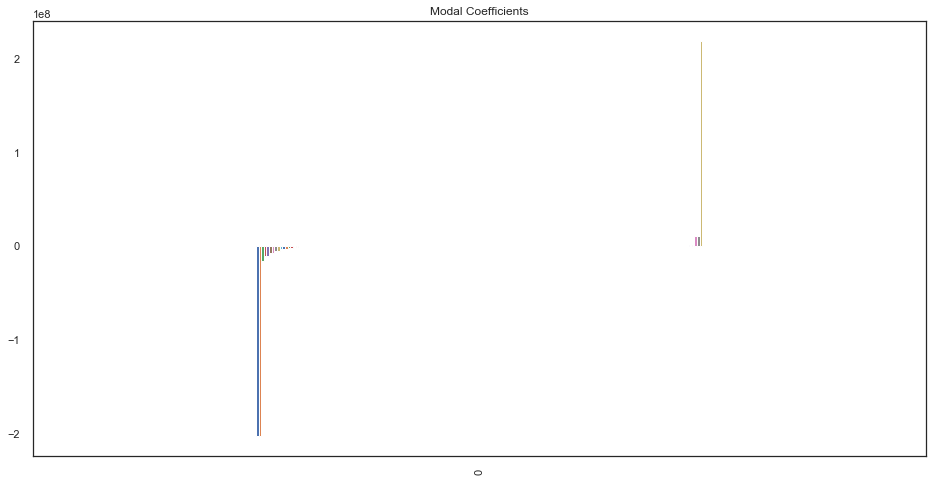

In [418]:
coef = pd.DataFrame(data=lm_rfe.coef_ ).T
coef.columns = selected_rfe

model_coef = coef.T.sort_values(by=0).T
model_coef.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8),)

In [419]:
coef.T

0
bedrooms                 2.195853e+08
bathrooms               -5.615736e+06
sqft_living             -1.109965e+04
sqft_lot                -2.457706e+03
floors                  -1.585880e+07
...                               ...
sqft_lot15^2             1.158193e-05
sqft_lot15 waterfront_0  9.185564e+02
sqft_lot15 waterfront_1  9.231450e+02
waterfront_0^2          -1.054327e+07
waterfront_1^2           1.054327e+07

[169 rows x 1 columns]

In [420]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, normalize=False)

lasso.fit(x_train,y_train)

y_train_pred = lasso.predict(x_train)
y_pred = lasso.predict(x_test)

train5_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
test5_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train5_rmse) )
print('Testing Error: '+ str(test5_rmse) )

Training Error: 107512.57227450606
Testing Error: 146791.92896148484


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134122144451825.84, tolerance: 78507295970.50275
  positive)


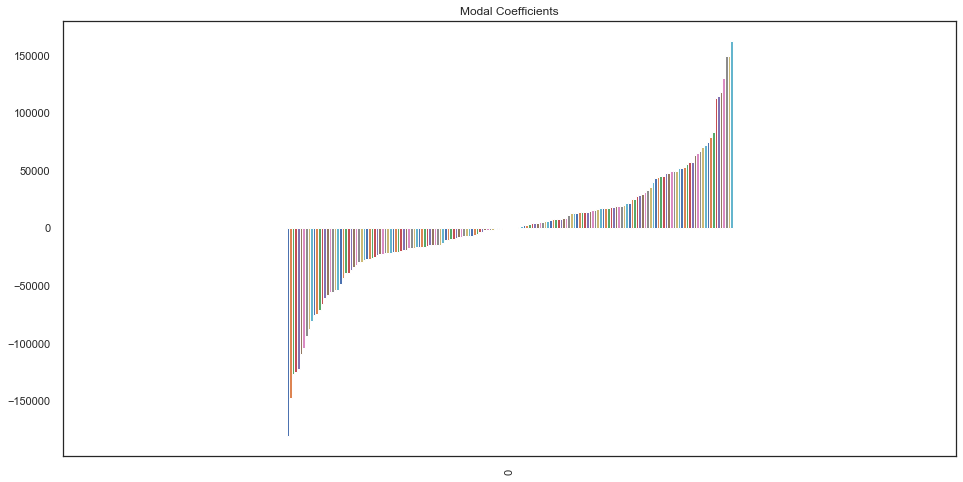

In [421]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = x_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [422]:
lasso_coef01.T

0
grade yr_built             -180600.724080
bedrooms yr_built          -147474.907248
sqft_living15 waterfront_0 -126454.279001
grade sqft_living15        -125282.209173
sqft_living sqft_above     -122193.548993
...                                   ...
bathrooms sqft_living       118480.518549
sqft_living15^2             130697.303595
yr_built sqft_lot15         149493.158433
sqft_living grade           149657.933410
condition sqft_living15     162895.046790

[170 rows x 1 columns]

In [423]:
from sklearn.linear_model import Lasso

lasso1 = Lasso(alpha=.1, normalize=False)

lasso1.fit(x_train,y_train)

y_train_lasso1 = lasso1.predict(x_train)
y_pred_lasso1 = lasso1.predict(x_test)

train5_rmse_lasso1 = metrics.mean_absolute_error(y_train, y_train_lasso1)
test5_rmse_lasso1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso1))
print('Training Error: '+ str(train5_rmse_lasso1) )
print('Testing Error: '+ str(test5_rmse_lasso1) )

Training Error: 107512.9190466421
Testing Error: 146792.25828763694


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 133876881797978.34, tolerance: 78507295970.50275
  positive)


In [424]:
lasso_coef1 = pd.DataFrame(data=lasso1.coef_).T
lasso_coef1.columns = x_train.columns

In [425]:
lasso_coef1.T

0
bedrooms                   5.752683e+04
bathrooms                  5.226937e+04
sqft_living                5.261823e+04
sqft_lot                  -1.711756e+03
floors                    -3.239600e+04
...                                 ...
sqft_lot15 waterfront_0   -5.593833e+04
sqft_lot15 waterfront_1   -3.126784e+02
waterfront_0^2             2.131529e+04
waterfront_0 waterfront_1  0.000000e+00
waterfront_1^2            -3.338007e-09

[170 rows x 1 columns]

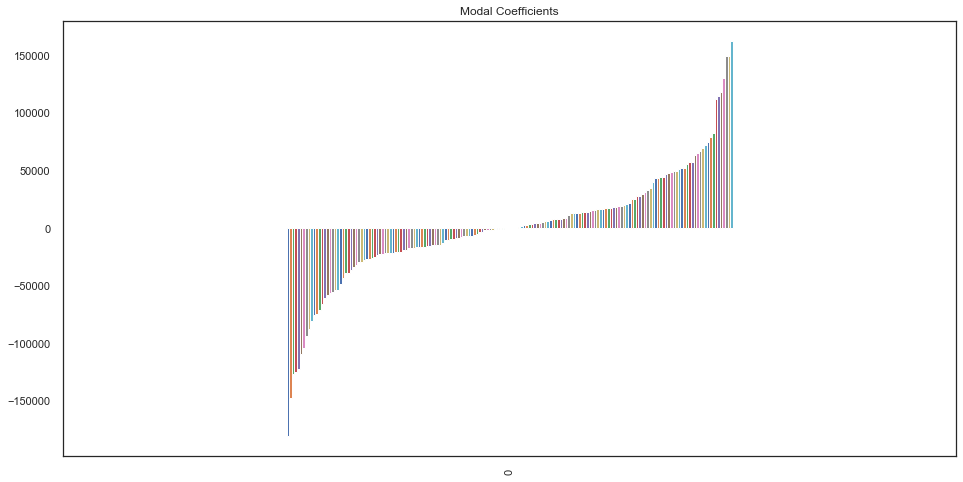

In [426]:
lasso_coef1 = lasso_coef1.T.sort_values(by=0).T
lasso_coef1.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

# Test Results for All

In [427]:
print('Original Training Error: ', int(train_rmse), 'Original Testing Error: ', int(test_rmse))
print('Poly Training Error: ', int(train2_rmse), 'Poly Testing Error: ', int(test2_rmse))
print('F-Test Training Error: ', int(train3_rmse), 'F-Test Testing Error: ', int(test3_rmse))
print('Recursive Training Error: ', int(train4_rmse), 'Recursive Testing Error: ', int(test4_rmse))
print('Lasso Training Error: ', int(train5_rmse_lasso1), 'Lasso Testing Error: ', int(test5_rmse_lasso1))

Original Training Error:  151548 Original Testing Error:  150341
Poly Training Error:  140107 Poly Testing Error:  144162
F-Test Training Error:  154359 F-Test Testing Error:  154072
Recursive Training Error:  140105 Recursive Testing Error:  144153
Lasso Training Error:  107512 Lasso Testing Error:  146792
